In [0]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRrC0pd9TVoYAjBYG2OrrC0yO7VsOb-kvq3w0A8sN02JxbWw0PtEgWEnZckAWZqItE3fl51MzxsQpkU/pub?gid=273957857&single=true&output=csv')

df2.head()

,Year,State,homicidespercap,homicides,universal,universalh,gunshow,gunshowh,universalpermit,universalpermith,backgroundpurge,ammbackground,threedaylimit,mentalhealth,statechecks,statechecksh,BKExists,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,HRExists,magazine,tenroundlimit,magazinepreowned,MagExists,White,Black,Native,Asian,Islander,Num_police,Popden_2010,Population,FLLPerCap,AlcoholConsumptionPerCapita,PropOfMales
0,2014,Alabama,0.000744,3625.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.683954,0.265353,0.005174,0.012949,0.000456,11209,59.0,4875120,0.000481,2.00,0.495271
1,2014,Alaska,0.000831,615.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.652578,0.032092,0.142161,0.061747,0.012287,1330,66.0,739786,0.001239,2.79,0.535216
2,2014,Arizona,0.000721,5079.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0.774993,0.043000,0.044080,0.031339,0.001962,13082,89.8,7048876,0.000484,2.38,0.512376
3,2014,Arkansas,0.000759,2280.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.773064,0.154459,0.006540,0.014227,0.002371,6465,56.2,3002997,0.000657,1.79,0.502776
4,2014,California,0.000461,18152.0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0.605580,0.058057,0.007491,0.141182,0.003900,78062,95.0,39399349,0.000198,2.32,0.509981


Normalize and scale

In [0]:
#normalize to log norm
df2.homicides = np.log(df2.homicides)

In [0]:
df2.tail()

,Year,State,homicidespercap,homicides,universal,universalh,gunshow,gunshowh,universalpermit,universalpermith,backgroundpurge,ammbackground,threedaylimit,mentalhealth,statechecks,statechecksh,BKExists,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,HRExists,magazine,tenroundlimit,magazinepreowned,MagExists,White,Black,Native,Asian,Islander,Num_police,Popden_2010,Population,FLLPerCap,AlcoholConsumptionPerCapita,PropOfMales
190,2018,Utah,0.000663,7.648311,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.868446,0.011229,0.010715,0.022561,0.008932,5091,90.6,3161105,0.000459,1.35,0.510248
191,2018,Virginia,0.000666,8.643808,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.683749,0.191902,0.002689,0.062171,0.000654,19331,75.5,8517685,0.000473,2.13,0.505842
192,2018,Washington,0.000672,8.529714,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.767205,0.036505,0.013215,0.080729,0.006426,10271,84.1,7535591,0.000386,2.25,0.514443
193,2018,West Virginia,0.001350,7.798523,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0.933445,0.035550,0.001809,0.007674,0.000295,3581,48.7,1805832,0.000762,1.75,0.511013
194,2018,Wisconsin,0.000863,8.520567,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0.858995,0.063486,0.008692,0.026431,0.000314,12825,70.2,5813568,0.000505,2.99,0.509361


In [0]:
from sklearn.preprocessing import StandardScaler

df2 = df2.drop(['State','Year'], axis = 1)

scaler = StandardScaler() 
scaler.fit(df2) 
numeric_scaled = scaler.transform(df2) 
numeric_scaled = pd.DataFrame(df2, columns=df2.columns)
numeric_scaled.head()



# Feature Selection and Linear Regression

RidgeCV

In [0]:
#split training set
df_train = df2[df2.Year<2018]
df_test = df2[df2.Year==2018]
#partition features
X_train = df_train.drop(columns=['homicides', 'State', 'homicidespercap', 'Year'])
y_train = df_train.homicides

# Fit the model
ridge = RidgeCV()
ridge.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['homicides', 'State', 'homicidespercap', 'Year'])
y_test = df_test.homicides

# Predict the number of wins
ridge.predict(X_test)

#get scores
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is -1338.972589520024 and the test score is -1402.4232159570736


In [0]:
betas = pd.Series(ridge.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": ridge.intercept_}))
print(betas)

universal                     -1.376556e-01
universalh                     1.680924e-01
gunshow                        1.283405e-03
gunshowh                       3.070314e-01
universalpermit               -2.140682e-02
universalpermith              -4.146181e-03
backgroundpurge                3.094484e-01
ammbackground                 -1.112237e+00
threedaylimit                 -3.733731e-02
mentalhealth                  -9.997899e-01
statechecks                    5.709657e-01
statechecksh                   5.882263e-01
BKExists                      -5.573849e-01
felony                        -3.571333e-01
invcommitment                  7.849144e-02
invoutpatient                  4.571045e-01
danger                        -4.121570e-01
drugmisdemeanor                2.941014e-01
alctreatment                   2.404956e-01
alcoholism                     9.146120e-02
relinquishment                 9.617723e-01
violent                       -1.848714e-01
violenth                      -1

Lin-Reg

In [0]:
#split training set
df_train = df2[df2.Year<2018]
df_test = df2[df2.Year==2018]
#partition features
X_train = df_train.drop(columns=['homicides', 'State', 'homicidespercap',  'Year'])
y_train = df_train.homicides

# Fit the model
lin = LinearRegression()
lin.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['homicides', 'State', 'homicidespercap',  'Year'])
y_test = df_test.homicides

# Predict the number of homicides
lin.predict(X_test)

#get scores
train_score = lin.score(X_train, y_train)
test_score = lin.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.9724200766675959 and the test score is -0.3072559752519306


In [0]:
betas = pd.Series(lin.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": lin.intercept_}))
print(betas)

universal                     -1.445207e+06
universalh                     1.445205e+06
gunshow                        1.445208e+06
gunshowh                      -1.445207e+06
universalpermit                7.679735e-01
universalpermith               7.549907e-01
backgroundpurge               -9.090604e-01
ammbackground                 -3.603925e+00
threedaylimit                  2.882676e-01
mentalhealth                  -1.211108e+00
statechecks                    1.338438e+00
statechecksh                   1.325455e+00
BKExists                      -1.046653e+00
felony                        -2.107896e-01
invcommitment                  7.605170e-01
invoutpatient                  3.187634e-01
danger                        -8.676229e-01
drugmisdemeanor                8.440691e-01
alctreatment                  -3.072862e-01
alcoholism                    -1.048488e-01
relinquishment                 1.152565e+00
violent                        1.266712e-01
violenth                       1

LassoCV

In [0]:
#split training set
df_train = df2[df2.Year<2018]
df_test = df2[df2.Year==2018]
#partition features
X_train = df_train.drop(columns=['homicides', 'State', 'homicidespercap', 'Year' ])
y_train = df_train.homicides

# Fit the model
lasso = LassoCV()
lasso.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['homicides', 'State', 'homicidespercap', 'Year'])
y_test = df_test.homicides

# calculate the score
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))



The train score is 0.6513636039482533 and the test score is 0.6385467306135142


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
# calculate betas
betas = pd.Series(lasso.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": lasso.intercept_}))
print(betas)

universal                     -0.000000e+00
universalh                    -0.000000e+00
gunshow                       -0.000000e+00
gunshowh                      -0.000000e+00
universalpermit               -0.000000e+00
universalpermith              -0.000000e+00
backgroundpurge               -0.000000e+00
ammbackground                  0.000000e+00
threedaylimit                  0.000000e+00
mentalhealth                  -0.000000e+00
statechecks                   -0.000000e+00
statechecksh                   0.000000e+00
BKExists                      -0.000000e+00
felony                        -0.000000e+00
invcommitment                 -0.000000e+00
invoutpatient                 -0.000000e+00
danger                        -0.000000e+00
drugmisdemeanor               -0.000000e+00
alctreatment                   0.000000e+00
alcoholism                     0.000000e+00
relinquishment                 0.000000e+00
violent                       -0.000000e+00
violenth                      -0

In [0]:
lasso.alpha_

59294.64739862136

i dont like lasso or ridge :( i'm trying manual feature selection now.

# Manual

In [0]:
df_train.head()

,Year,State,homicidespercap,homicides,universal,universalh,gunshow,gunshowh,universalpermit,universalpermith,backgroundpurge,ammbackground,threedaylimit,mentalhealth,statechecks,statechecksh,BKExists,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,HRExists,magazine,tenroundlimit,magazinepreowned,MagExists,White,Black,Native,Asian,Islander,Num_police,Popden_2010,Population,FLLPerCap,AlcoholConsumptionPerCapita,PropOfMales
0,2014,Alabama,0.000744,8.195610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.683954,0.265353,0.005174,0.012949,0.000456,11209,59.0,4875120,0.000481,2.00,0.495271
1,2014,Alaska,0.000831,6.421622,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.652578,0.032092,0.142161,0.061747,0.012287,1330,66.0,739786,0.001239,2.79,0.535216
2,2014,Arizona,0.000721,8.532870,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0.774993,0.043000,0.044080,0.031339,0.001962,13082,89.8,7048876,0.000484,2.38,0.512376
3,2014,Arkansas,0.000759,7.731931,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.773064,0.154459,0.006540,0.014227,0.002371,6465,56.2,3002997,0.000657,1.79,0.502776
4,2014,California,0.000461,9.806536,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0.605580,0.058057,0.007491,0.141182,0.003900,78062,95.0,39399349,0.000198,2.32,0.509981


In [0]:
df_train.corr()

,Year,homicidespercap,homicides,universal,universalh,gunshow,gunshowh,universalpermit,universalpermith,backgroundpurge,ammbackground,threedaylimit,mentalhealth,statechecks,statechecksh,BKExists,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,HRExists,magazine,tenroundlimit,magazinepreowned,MagExists,White,Black,Native,Asian,Islander,Num_police,Popden_2010,Population,FLLPerCap,AlcoholConsumptionPerCapita,PropOfMales
Year,1.000000e+00,0.390191,0.099414,0.044821,0.040825,0.021058,0.019539,0.039392,0.035857,0.000000,1.791615e-18,0.029096,-1.510822e-18,-9.458465e-18,6.895928e-18,0.017860,0.000000,-0.017860,-0.018001,-0.035591,-0.020616,0.000000,-2.646390e-18,0.000000,-6.294373e-18,-6.294373e-18,0.000000e+00,-2.885887e-18,-1.658713e-18,-3.808034e-18,-0.036886,-1.658713e-18,3.341423e-18,3.367619e-18,2.490362e-18,-2.838052e-18,1.905454e-18,1.210398e-18,0.000000,-0.008285,0.023838,0.014553,0.040637
homicidespercap,3.901907e-01,1.000000,-0.328929,-0.321325,-0.273819,-0.374715,-0.329622,-0.477918,-0.437914,-0.489732,-2.434532e-01,-0.266330,-3.997847e-01,-4.121958e-01,-3.636239e-01,-0.444443,-0.068641,-0.252207,-0.210875,-0.259228,-0.314081,-0.144628,2.033508e-01,-0.292846,-3.650063e-01,-3.650063e-01,-2.758103e-01,-6.496067e-02,-4.412248e-01,-4.017436e-01,-0.405733,-4.412248e-01,2.951458e-01,-7.618478e-02,3.486656e-01,-6.360037e-01,-6.140043e-03,-5.133933e-01,-0.577086,-0.513396,0.572841,-0.075137,0.197507
homicides,9.941370e-02,-0.328929,1.000000,-0.021114,0.060959,0.024021,0.099046,0.042068,0.189993,0.126885,8.837337e-03,0.260568,1.113263e-01,1.315902e-01,2.727966e-01,0.181898,-0.179681,-0.107849,-0.094652,-0.097660,-0.049716,-0.085516,1.783688e-01,0.189234,2.091210e-01,2.091210e-01,-5.413638e-02,-2.079461e-02,1.791504e-01,1.901972e-01,0.197085,1.791504e-01,-1.604091e-01,1.564759e-01,-3.941504e-01,2.635022e-01,-3.488543e-01,6.357587e-01,0.372919,0.807142,-0.561733,-0.275434,-0.254466
universal,4.482107e-02,-0.321325,-0.021114,1.000000,0.853913,0.902962,0.783305,0.796477,0.625000,0.626004,1.157275e-01,0.195615,6.556829e-01,5.483789e-01,3.758361e-01,0.616388,0.218750,0.216136,0.319142,0.186996,0.228957,-0.158114,-1.424507e-02,0.220354,5.025763e-01,5.025763e-01,3.425303e-01,1.087397e-01,4.776786e-01,4.202090e-01,0.242477,4.776786e-01,-1.028551e-01,-1.737791e-01,-1.098155e-01,4.757413e-01,1.611356e-01,2.529108e-01,0.386359,0.219365,-0.275450,0.329239,0.092007
universalh,4.082483e-02,-0.273819,0.060959,0.853913,1.000000,0.759409,0.917313,0.653989,0.731925,0.613222,7.027284e-02,0.427618,6.750000e-01,4.376536e-01,5.249008e-01,0.721840,0.097590,0.289222,0.200868,0.263960,0.434855,-0.185164,-6.487491e-02,0.336067,6.172134e-01,6.172134e-01,4.841229e-01,1.273429e-01,5.367450e-01,5.181036e-01,0.190741,5.367450e-01,-1.740421e-01,-6.055656e-02,-1.505389e-01,4.721207e-01,8.961908e-02,2.697161e-01,0.416551,0.224568,-0.241090,0.272104,0.012618
gunshow,2.105847e-02,-0.374715,0.024021,0.902962,0.759409,1.000000,0.867484,0.846124,0.659446,0.699224,3.217053e-01,0.304824,7.594090e-01,6.697827e-01,4.708816e-01,0.682629,0.242258,0.262646,0.406238,0.236089,0.323439,-0.175106,-4.684974e-02,0.364761,4.457237e-01,4.457237e-01,4.328527e-01,1.204255e-01,4.121535e-01,3.647612e-01,0.208429,4.121535e-01,-1.024876e-01,-1.718059e-01,-1.308039e-01,4.794580e-01,1.338074e-01,1.797888e-01,0.428043,0.240033,-0.282991,0.322663,0.080184
gunshowh,1.953869e-02,-0.329622,0.099046,0.783305,0.917313,0.867484,1.000000,0.716645,0.767542,0.689952,2.648555e-01,0.521592,7.790515e-01,5.622596e-01,6.116577e-01,0.786907,0.127470,0.332094,0.290946,0.308680,0.516721,-0.201855,-9.314704e-02,0.468003,5.661780e-01,5.661780e-01,5.663786e-01,1.388216e-01,4.797136e-01,4.680031e-01,0.164559,4.797136e-01,-1.720090e-01,-6.586157e-02,-1.697161e-01,4.819916e-01,6.944711e-02,2.044839e-01,0.459025,0.246412,-0.253187,0.272785,0.006258
universalpermit,3.939193e-02,-0.477918,0.042068,0.796477,0.653989,0.846124,0.716645,1.000000,

,Year,homicidespercap,homicides,universal,universalh,gunshow,gunshowh,universalpermit,universalpermith,backgroundpurge,ammbackground,threedaylimit,mentalhealth,statechecks,statechecksh,BKExists,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,HRExists,magazine,tenroundlimit,magazinepreowned,MagExists,White,Black,Native,Asian,Islander,Num_police,Popden_2010,Population,FLLPerCap,AlcoholConsumptionPerCapita,PropOfMales
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homicidespercap,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homicides,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
universal,NaN,NaN,NaN,1.000000,NaN,0.902962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
universalh,NaN,NaN,NaN,NaN,1.000000,NaN,0.917313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gunshow,NaN,NaN,NaN,0.902962,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gunshowh,NaN,NaN,NaN,NaN,0.917313,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
universalpermit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
universalpermith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.916564,NaN,NaN,NaN,NaN,NaN,0.986221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backgroundpurge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.916564,1.000000,NaN,NaN,NaN,NaN,NaN,0.931891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


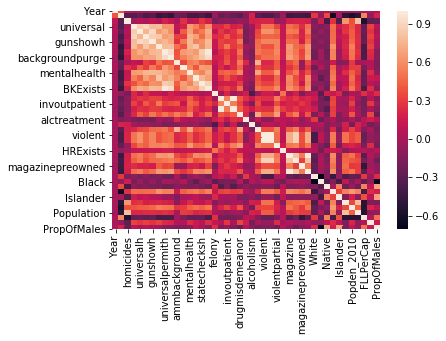

In [0]:
sns.heatmap(df_train.corr())
df_train.corr()[df_train.corr().abs() > 0.9]

In [0]:
def print_heavily_correlated_features(df, threshold):
  corr = df.corr().abs()
  corr = corr[corr > threshold]
  print(corr.count().sort_values(ascending=False) - 1)

print_heavily_correlated_features(df_train, 0.7)

universalpermit                8
gunshowh                       7
BKExists                       7
universalpermith               7
mentalhealth                   6
backgroundpurge                5
universalh                     5
gunshow                        5
magazine                       4
violent                        4
violenth                       4
tenroundlimit                  4
statechecksh                   4
MagExists                      4
universal                      4
statechecks                    3
relinquishment                 3
Population                     2
White                          1
Black                          1
Num_police                     1
homicides                      1
ammbackground                  1
drugmisdemeanor                1
danger                         1
invcommitment                  1
threedaylimit                  0
homicidespercap                0
PropOfMales                    0
alctreatment                   0
felony    

Lin-Reg after manual feature selection

In [0]:
# We have made a copy of the data frame
df_reduced = df2.copy()

# Remove the 5 top most correlated columns
COLUMNS_TO_REMOVE = ['universalpermit', 'BKExists','gunshowh', 'universalpermith', 'mentalhealth', 'backgroundpurge', 'universalh', 'gunshow' ]
df_reduced = df_reduced.drop(axis = 1, columns=COLUMNS_TO_REMOVE)

# Split the data into training and testing sets
df_train = df_reduced[df_reduced.Year<2018]
df_test = df_reduced[df_reduced.Year==2018]

#partition features
X_train = df_train.drop(columns=['homicides', 'State', 'Year', 'homicidespercap'])
y_train = df_train.homicides

# Fit the model
linreg_reduced = LinearRegression()
linreg_reduced.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['homicides', 'State', 'Year','homicidespercap'])
y_test = df_test.homicides

# Predict the number of homicides
linreg_reduced.predict(X_test)

# calculate the score
train_score = linreg_reduced.score(X_train, y_train)
test_score = linreg_reduced.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.9478538639637253 and the test score is 0.773531292666706


With universalpermit', 'BKExists','gunshowh', 'universalpermith', 'mentalhealth' removed, The train score is 0.9734715903935257 and the test score is 0.9633634268744428

with background purge, universalh, and gunshow also removed, The train score is 0.9715072165427405 and the test score is 0.9610725753387043

In [0]:
# calculate betas
betas = pd.Series(linreg_reduced.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg_reduced.intercept_}))
print(betas)
# -------------------

universal                     -8.548653e-01
ammbackground                 -2.010996e+00
threedaylimit                 -1.412319e-01
statechecks                    1.369924e+00
statechecksh                   2.621676e-01
felony                         3.078181e-01
invcommitment                  1.853004e+00
invoutpatient                  1.903444e-01
danger                        -1.818541e+00
drugmisdemeanor                7.562325e-01
alctreatment                  -1.168883e-01
alcoholism                     3.174278e-01
relinquishment                 7.425739e-01
violent                        2.360068e-01
violenth                       2.360068e-01
violentpartial                -9.753230e-01
HRExists                      -4.051072e-01
magazine                      -1.814649e-01
tenroundlimit                  2.000543e-01
magazinepreowned              -8.872075e-02
MagExists                     -1.814649e-01
White                          9.128922e+00
Black                          7

with exists removed

In [0]:
# We have made a copy of the data frame
df_reduced = df2.copy()

# Remove the 5 top most correlated columns
COLUMNS_TO_REMOVE = ['universalpermit', 'BKExists','gunshowh', 'universalpermith', 'mentalhealth', 'backgroundpurge', 'universalh', 'gunshow']
df_reduced = df_reduced.drop(axis = 1, columns=COLUMNS_TO_REMOVE)

# Split the data into training and testing sets
df_train = df_reduced[df_reduced.Year<2018]
df_test = df_reduced[df_reduced.Year==2018]

#partition features
X_train = df_train.drop(columns=['homicides', 'State', 'Year', 'MagExists', 'HRExists', 'homicidespercap'])
y_train = df_train.homicides

# Fit the model
linreg_reduced = LinearRegression()
linreg_reduced.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['homicides', 'State', 'Year', 'MagExists', 'HRExists', 'homicidespercap'])
y_test = df_test.homicides

# Predict the number of homicides
linreg_reduced.predict(X_test)

# calculate the score
train_score = linreg_reduced.score(X_train, y_train)
test_score = linreg_reduced.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.9452215053491684 and the test score is 0.8884904986222126


In [0]:
# calculate betas
betas = pd.Series(linreg_reduced.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg_reduced.intercept_}))
print(betas)
# -------------------

universal                     -8.160056e-01
ammbackground                 -1.857364e+00
threedaylimit                 -7.065885e-02
statechecks                    1.351409e+00
statechecksh                   1.897727e-01
felony                         4.942298e-02
invcommitment                  1.602765e+00
invoutpatient                  2.400794e-01
danger                        -1.697798e+00
drugmisdemeanor                7.014953e-01
alctreatment                  -9.897228e-02
alcoholism                     1.733375e-01
relinquishment                 5.691781e-01
violent                        2.478767e-01
violenth                       2.478767e-01
violentpartial                -8.962456e-01
magazine                      -5.332842e-01
tenroundlimit                  4.122205e-01
magazinepreowned              -4.412305e-02
White                          7.450272e+00
Black                          6.370647e+00
Native                         1.067804e+01
Asian                          4

The train score is 0.9710144406809891 and the test score is 0.9605713790501796 with ALL exists removed. hard to tell if this score has less overfitting than the one above that had a higher score but had 2 EXISTS in it. 

Nov 30 2019 - what if i removed too many features?

In [0]:
# We have made a copy of the data frame
df_reduced = df2.copy()

# Remove the 5 top most correlated columns
COLUMNS_TO_REMOVE = ['universalpermit', 'BKExists','gunshowh', 'universalpermith', 'mentalhealth' ]
df_reduced = df_reduced.drop(axis = 1, columns=COLUMNS_TO_REMOVE)

# Split the data into training and testing sets
df_train = df_reduced[df_reduced.Year<2018]
df_test = df_reduced[df_reduced.Year==2018]

#partition features
X_train = df_train.drop(columns=['homicides', 'State', 'Year', 'homicidespercap'])
y_train = df_train.homicides

# Fit the model
linreg_reduced = LinearRegression()
linreg_reduced.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['homicides', 'State', 'Year','homicidespercap'])
y_test = df_test.homicides

# Predict the number of homicides
linreg_reduced.predict(X_test)

# calculate the score
train_score = linreg_reduced.score(X_train, y_train)
test_score = linreg_reduced.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.9554794720624114 and the test score is 0.5670810481469015


# Other Models

In [0]:
def scoreData(df,mdl,dfName):
  #split training set
  df_train = df[df.Year<2018]
  df_test = df[df.Year==2018]

  #partition features
  X_train = df_train.drop(columns=['homicides', 'State', 'Year', 'MagExists', 'HRExists', 'homicidespercap', 'universalpermit', 'BKExists','gunshowh', 'universalpermith', 'mentalhealth', 'backgroundpurge', 'universalh', 'gunshow'])
  y_train = df_train.homicides

  # Fit the model
  #define your model here
  reg = mdl.fit(X_train, y_train)

  # Partition the testing data into features and target
  X_test = df_test.drop(columns=['homicides', 'State', 'Year', 'MagExists', 'HRExists', 'homicidespercap', 'universalpermit', 'BKExists','gunshowh', 'universalpermith', 'mentalhealth', 'backgroundpurge', 'universalh', 'gunshow'])
  y_test = df_test.homicides

  # Predict the number of wins
  reg.predict(X_test)

  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)

  print('{}: The train score is {} and the test score is {}'.format(dfName,train_score, test_score))
  return train_score, test_score

# CART

In [0]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG
from graphviz import Source

In [0]:
def fit_and_score_model(mdl, x_train, x_test, y_train, y_test, random_state=0):
    """
    This function will fit and score the input mdl to the x_train and y_train 
    data, and score the mdl on y_train and y_test. To ensure results are 
    reproducible we can also set a random state.
    """
  
    # Fit an arbitrary model
    mdl.fit(x_train, y_train)
    
    # Calculate the score of the model on training and testing data
    train_score = mdl.score(x_train, y_train)
    test_score = mdl.score(x_test, y_test)
  
    # Print scores to terminal
    print('the accuracy on the: \n\t training data is {}'.format(round(train_score,3)))
    print('\t testing data is {}'.format(round(test_score, 3)))
    
    return train_score, test_score

In [0]:
#split training set
  df_train = df2[df2.Year<2018]
  df_test = df2[df2.Year==2018]

  #partition features
  X_train = df_train.drop(columns=['homicides', 'State', 'Year', 'MagExists', 'HRExists', 'BKExists', 'homicidespercap', 'universalpermit','gunshowh', 'universalpermith', 'mentalhealth', 'backgroundpurge', 'universalh', 'gunshow'])
  y_train = df_train.homicides

  # Partition the testing data into features and target
  X_test = df_test.drop(columns=['homicides', 'State', 'Year', 'MagExists', 'HRExists', 'BKExists', 'homicidespercap', 'universalpermit','gunshowh', 'universalpermith', 'mentalhealth', 'backgroundpurge', 'universalh', 'gunshow'])
  y_test = df_test.homicides

CART Regressor

In [0]:
#model definition
cart_model = DecisionTreeRegressor()
train_score, test_score = fit_and_score_model(cart_model, X_train, X_test, y_train, y_test)



the accuracy on the: 
	 training data is 1.0
	 testing data is 0.963


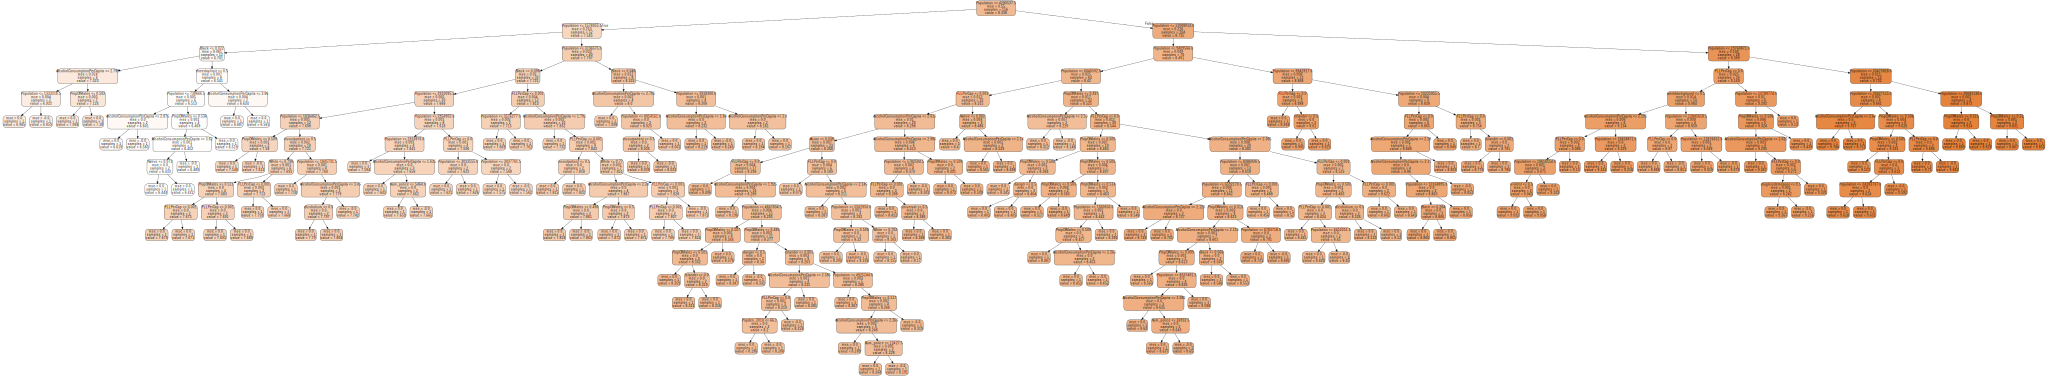

In [0]:
# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = X_train.columns,
                   rounded = True, proportion = False, 
                  filled = True))
SVG(cart_graph.pipe(format='svg'))

CART Classifier - cant use on continuous data

In [0]:
#model definition
cart_model = DecisionTreeClassifier()
train_score, test_score = fit_and_score_model(cart_model, X_train, X_test, y_train, y_test)

ValueError: ignored

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

RFRegressor

In [0]:
# Initialize the model
    rf_baseline_model = RandomForestRegressor(
        random_state = 0, 
        max_depth = None,
        n_estimators = 30, max_features = 0.2
    )
    
    # Fit and train model
    train_score, test_score = fit_and_score_model(rf_baseline_model, X_train, X_test, y_train, y_test)
    

the accuracy on the: 
	 training data is 0.997
	 testing data is 0.979


Version with Stacking - can't stack nvm

In [0]:
##see other colab file for stacking

RF classifier - can't use on continuous data

In [0]:
# Initialize the model
    rf_baseline_model = RandomForestClassifier(
        random_state = 0, 
        max_depth = None,
        n_estimators = 30, max_features = 0.2
    )
    
    # Fit and train model
    train_score, test_score = fit_and_score_model(rf_baseline_model, X_train, X_test, y_train, y_test)
    

ValueError: ignored